<a href="https://colab.research.google.com/github/Murari2124/sent_analysis/blob/main/Sentiment_identificaton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data loading

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preprocessing and model development

In [57]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [58]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [59]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
train = pd.read_csv('/content/drive/MyDrive/archive (2)/train.csv', encoding='ISO-8859-1')
train = train[['text','sentiment']]

test = pd.read_csv('/content/drive/MyDrive/archive (2)/test.csv', encoding='ISO-8859-1')
test = test[['text','sentiment']]

df = train.append(test)
df = df.dropna()
df = df.reset_index(drop=True)
c=0
for i in df['sentiment']:
  if(i=='neutral'):
    df['sentiment'][c]=0
    c+=1
  elif(i=='negative'):
    df['sentiment'][c]=-1
    c+=1
  else:
    df['sentiment'][c]=1
    c+=1
df.head()

<ipython-input-59-188a7d2568ac>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train.append(test)


,text,sentiment
0,"I`d have responded, if I were going",0
1,Sooo SAD I will miss you here in San Diego!!!,-1
2,my boss is bullying me...,-1
3,what interview! leave me alone,-1
4,"Sons of ****, why couldn`t they put them on t...",-1


In [60]:
data = df['text']
labels = df['sentiment']

<Axes: xlabel='sentiment', ylabel='Count'>

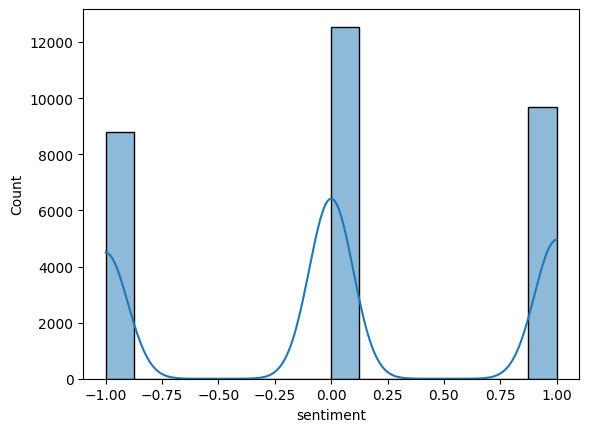

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['sentiment'],kde=True)

In [62]:
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation
    text = ''.join([c for c in text if c.isalpha() or c.isspace()])

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a single string
    processed_text = ' '.join(tokens)

    return processed_text


'def predict(model, X):\n    model.eval()\n    with torch.no_grad():\n        outputs = model(X)\n        _, predicted = torch.max(outputs.data, 1)\n    return predicted'

In [63]:
from numpy.random.mtrand import logistic
def train_test_model(data, labels):
    # Preprocess the data
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    preprocessed_data = [preprocess_text(str(text)) for text in data]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(preprocessed_data, labels, test_size=0.2, random_state=42)

    # Vectorize the preprocessed data using TF-IDF
    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)


    # Train a LinearSVC model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    
    # Evaluate the model
    #y_pred = predict(model, X_test)
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print("Model Evaluation:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)

    return model, vectorizer, label_encoder


In [64]:
 model, vectorizer, label_encoder = train_test_model(data, labels)

Model Evaluation:
Accuracy: 0.6893438658713525
Precision: 0.6983501955981877
Recall: 0.6893438658713525
F1-Score: 0.6891157128860143


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
